## An example how to calculate sdg 11.2 indicator for Nairobi

In [28]:
import os
import sys

import pandas as pd

project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
from matplotlib import pyplot as plt
from ptac import accessibility as accessibility

Load stops and population data and generate boundary from population data.
The boundary is necessary to download the network afterwards.

In [29]:
#stops = gpd.read_file(project_path + "/data/pt_example.gpkg")
stops_high_capacity = gpd.read_file(project_path + "/data/nairobi_pt_high_capacity.gpkg")
stops_low_capacity = gpd.read_file(project_path + "/data/nairobi_pt_low_capacity.gpkg")

In [30]:
stops = pd.concat([stops_low_capacity, stops_high_capacity])

In [31]:
population_points = gpd.read_file(project_path + "/data/nairobi_population.gpkg")
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326',
                                geometry=[population_points.unary_union.convex_hull])

<AxesSubplot:>

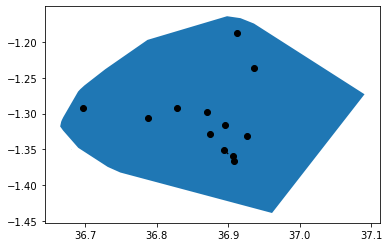

In [33]:
ax = boundary_gdf.plot()
stops_high_capacity.plot(color="black", ax=ax)

Plot population and pt stops

<AxesSubplot:>

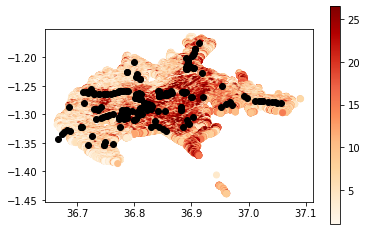

In [10]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True)
stops_low_capacity.plot(color="black", ax=ax)

<AxesSubplot:>

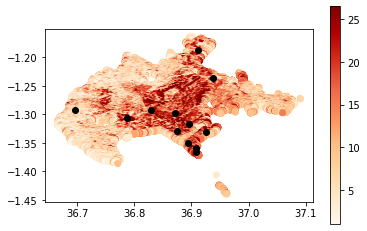

In [11]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True)
stops_high_capacity.plot(color="black", ax=ax)

In [12]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 4394931.068011523


Now calculate the accessibilities from population point data to stations

In [9]:
accessibility_output_high = accessibility.distance_to_closest(
    start_geometries=population_points,
    destination_geometries=stops_high_capacity,
    transport_system="high-capacity",
    boundary_geometries=boundary_gdf,
    epsg=21097,
    network_exists=False,
    verbose=5)

No street network was specified. Loading osm network..

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 1000 m calculated in 1319 seconds


In [10]:
accessibility_output_low = accessibility.distance_to_closest(
    start_geometries=population_points,
    destination_geometries=stops_low_capacity,
    transport_system="low-capacity",
    boundary_geometries=boundary_gdf,
    epsg=21097,
    network_exists=True,
    verbose=5)

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 500 m calculated in 217 seconds


In [11]:
sdg_low_high = accessibility.calculate_sdg(population=population_points,
                            input=[accessibility_output_high, accessibility_output_low],
                            population_column='pop')
print(f"{sdg_low_high} percent of the population have access to low- and high-capacity public transit systems")

,index,pop,x_coord,y_coord,geometry,x,y,o_id,d_id,avg_distance,...,avg_co2,avg_interchanges,avg_access,avg_egress,avg_waiting_time,avg_init_waiting_time,avg_pt_tt,avg_pt_interchange_time,modes,distance_pt
487,487,10.063035,36.915773,-1.171897,POINT (267977.365 -129317.099),267977.364908,-129317.098649,487.0,170.0,520.107686,...,0.0,0.0,31.060397,12.934804,0.0,0.0,0.0,0.0,[foot],476.112485
488,488,14.564919,36.916042,-1.171897,POINT (268007.367 -129317.076),268007.366617,-129317.076369,488.0,170.0,516.943051,...,0.0,0.0,8.322863,12.934804,0.0,0.0,0.0,0.0,[foot],495.685384
489,489,19.066803,36.916312,-1.171897,POINT (268037.368 -129317.054),268037.368322,-129317.054092,489.0,170.0,505.338983,...,0.0,0.0,6.916294,12.934804,0.0,0.0,0.0,0.0,[foot],485.487885
536,536,7.679684,36.914695,-1.172167,POINT (267857.380 -129346.995),267857.380168,-129346.995004,536.0,170.0,532.373724,...,0.0,0.0,28.127902,12.934804,0.0,0.0,0.0,0.0,[foot],491.311019
582,582,15.359368,36.914964,-1.172436,POINT (267887.404 -129376.780),267887.404048,-129376.779911,582.0,170.0,461.464639,...,0.0,0.0,26.667816,12.934804,0.0,0.0,0.0,0.0,[foot],421.862019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314551,314551,5.561151,36.746799,-1.357848,POINT (249183.077 -149900.920),249183.077117,-149900.920330,314551.0,96.0,423.075717,...,0.0,0.0,3.580774,26.908428,0.0,0.0,0.0,0.0,[foot],392.586515
314552,314552,6.355601,36.747069,-1.357848,POINT (249213.080 -149900.892),249213.080060,-149900.892411,314552.0,96.0,456.554502,...,0.0,0.0,33.354441,26.908428,0.0,0.0,0.0,0.0,[foot],396.291633
314684,314684,9.003768,36.746799,-1.358118,POINT (249183.105 -149930.731),249183.104862,-149930.730907,314684.0,96.0,512.529921,...,0.0,0.0,5.522450,26.908428,0.0,0.0,0.0,0.0,[foot],480.099043
314685,314685,7.944501,36.747069,-1.358118,POINT (249213.108 -149930.703),249213.107801,-149930.702982,314685.0,96.0,516.929607,...,0.0,0.0,15.387029,26.908428,0.0,0.0,0.0,0.0,[foot],474.634151


In [13]:
accessibility_output = accessibility.distance_to_closest(
    start_geometries=population_points,
    destination_geometries=stops,
    transport_system=None,
    maximum_distance=500,
    boundary_geometries=boundary_gdf,
    epsg=32737,
    network_exists=False,
    verbose=5)

No street network was specified. Loading osm network..

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 500 m calculated in 500 seconds


In [16]:
sdg_500m = accessibility.calculate_sdg(population=population_points,
                            input=accessibility_output,
                            population_column='pop')
print(f"{sdg_500m} percent of the population have access to public transit systems in 500 m")



Calculating SDG 11.2. indicator ... 
SDG 11.2.1 indicator is calculated
0.14194777397083347 percent of the population have access to public transit systems in 500 m
